<a href="https://colab.research.google.com/github/pavel7479/AvitoTech/blob/master/Test_%D0%9E%D0%9E%D0%9E_%22%D0%9D%D0%B0%D1%81%D0%BA%D0%B0%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Создаём ряды

In [26]:
# Загрузим необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Генерим случайным образом 100 рядов с длинной от 0 до 1000. В каждом два значения profits от -1000 до 1000 и durations от 0 до 1200

# Функция для генерации одного ряда данных
def generate():
  length = np.random.randint(0, 1000)  # Длина ряда
  # Генерация массива из случайных чисел от 0 до 1
  random_profits = np.random.random(length)
  # Масштабирование и сдвиг для получения значений в диапазоне от -1000 до 1000
  profits = (random_profits * 2000) - 1000
  # Округление до 4 знаков после запятой
  profits = np.round(profits, 4)
  # то же самое делаем с duration
  random_durations = np.random.random(length)
  durations = (random_durations * 1200) + 1
  durations = np.round(durations, 4)

  return profits, durations

# Количество рядов данных
num_rows = 100

# Списки для хранения данных
all_profits = []
all_durations = []

# Генерация данных
for _ in range(num_rows):
    profits, durations = generate()
    all_profits.append(profits)
    all_durations.append(durations)

# Преобразование данных в DataFrame для удобства анализа
data = {'profits': all_profits, 'durations': all_durations}

df = pd.DataFrame(data)

# Пример вывода данных
print(df.head())



                                             profits  \
0  [72.8214, 544.3183, -857.7521, -232.7505, -162...   
1  [102.7524, 211.9186, -943.1156, -146.8027, -36...   
2  [215.1455, -189.8053, -210.4482, -627.775, -11...   
3  [605.6464, -329.7269, 450.2421, 947.3898, 661....   
4  [-597.0763, -644.7621, -816.9475, -877.272, 33...   

                                           durations  
0  [85.5162, 968.4423, 760.2474, 136.912, 296.509...  
1  [875.0347, 794.1166, 33.5308, 863.9948, 188.86...  
2  [571.8519, 995.2229, 906.1175, 544.9221, 961.2...  
3  [352.052, 116.6717, 123.2991, 1145.1136, 105.5...  
4  [353.7909, 707.2235, 134.0153, 303.632, 701.38...  


In [24]:
print(len(all_profits[0]))
print(len(all_durations[0]))

957
957


# Задача 1

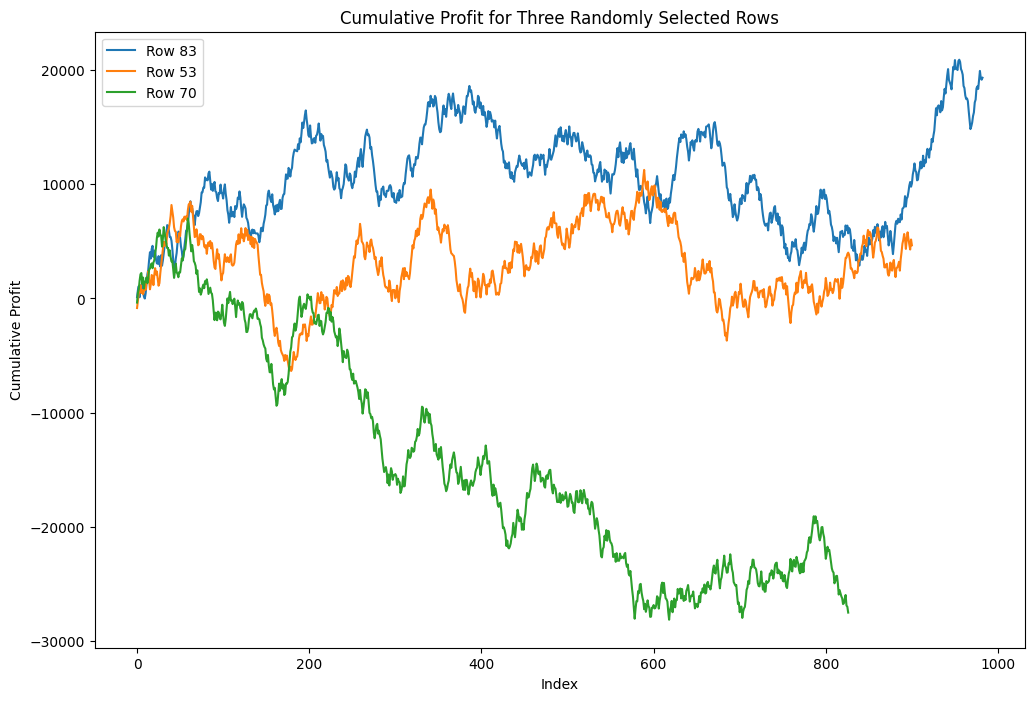

In [27]:

# Выбор трех случайных рядов
sample_rows = df.sample(n=3, random_state=42).index

# Построение графиков
plt.figure(figsize=(12, 8))

for row in sample_rows:
    # Извлечение прибыли для текущего ряда
    profits = df.loc[row, 'profits']
    # Расчет накопленной прибыли
    cumulative_profits = np.cumsum(profits)
    # Построение графика
    plt.plot(cumulative_profits, label=f'Row {row}')

plt.xlabel('Index')
plt.ylabel('Cumulative Profit')
plt.title('Cumulative Profit for Three Randomly Selected Rows')
plt.legend()
plt.show()


# Задача 2

   row  max_drawdown  avg_duration  max_duration  total_profit  \
0   83    15732.3051    612.548878     1198.9127    19335.4946   
1   53    14950.3690    617.320521     1200.1398     4662.9291   
2   70    35141.3689    590.001747     1198.7322   -27510.6408   

   recovery_factor  
0         1.229031  
1         0.311894  
2        -0.782856  


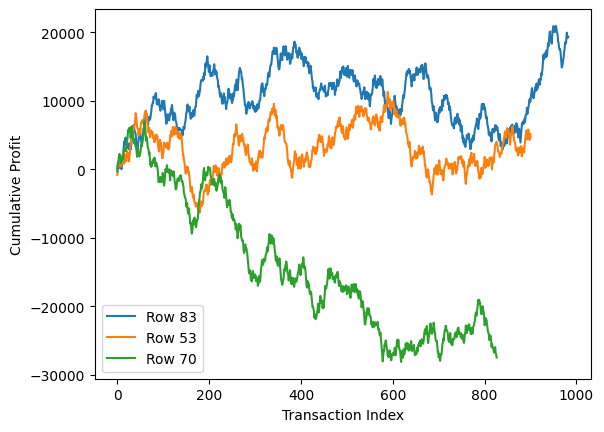

In [28]:

metrics = []

for row in sample_rows:
    # Извлечение данных для текущего ряда
    profits = df.loc[row, 'profits']
    durations = df.loc[row, 'durations']

    # Вычисление накопленной прибыли
    cumulative_profits = np.cumsum(profits)

    # Максимальная просадка
    running_max = np.maximum.accumulate(cumulative_profits)
    drawdowns = running_max - cumulative_profits
    max_drawdown = np.max(drawdowns)

    # Среднее время в позиции
    avg_duration = np.mean(durations)

    # Максимальное время в позиции
    max_duration = np.max(durations)

    # Итоговая прибыль
    total_profit = cumulative_profits[-1]

    # Recovery factor
    if max_drawdown != 0:
        recovery_factor = total_profit / max_drawdown
    else:
        recovery_factor = np.inf  # Бесконечность если нет просадки

    metrics.append({
        'row': row,
        'max_drawdown': max_drawdown,
        'avg_duration': avg_duration,
        'max_duration': max_duration,
        'total_profit': total_profit,
        'recovery_factor': recovery_factor
    })

# Создание DataFrame с метриками
metrics_df = pd.DataFrame(metrics)

# Вывод метрик
print(metrics_df)

# Пример построения графиков
for row in sample_rows:
    profits = df.loc[row, 'profits']
    cumulative_profits = np.cumsum(profits)
    plt.plot(cumulative_profits, label=f'Row {row}')

plt.xlabel('Transaction Index')
plt.ylabel('Cumulative Profit')
plt.legend()
plt.show()


# Задача 3

In [32]:
metrics = []

for row in df.index:
    # Извлечение данных для текущего ряда
    profits = df.loc[row, 'profits']
    durations = df.loc[row, 'durations']

    # Вычисление накопленной прибыли
    cumulative_profits = np.cumsum(profits)

    # Максимальная просадка
    running_max = np.maximum.accumulate(cumulative_profits)
    drawdowns = running_max - cumulative_profits
    max_drawdown = np.max(drawdowns)

    # Среднее время в позиции
    avg_duration = np.mean(durations)

    # Максимальное время в позиции
    max_duration = np.max(durations)

    # Итоговая прибыль
    total_profit = cumulative_profits[-1]

    # Recovery factor
    if max_drawdown != 0:
        recovery_factor = total_profit / max_drawdown
    else:
        recovery_factor = np.inf  # Бесконечность если нет просадки

    # Добавление метрик в список metrics
    metrics.append({
        'row': row,
        'max_drawdown': max_drawdown,
        'avg_duration': avg_duration,
        'max_duration': max_duration,
        'total_profit': total_profit,
        'recovery_factor': recovery_factor
    })

# Создание DataFrame с метриками
metrics_df = pd.DataFrame(metrics)

# Вывод метрик
print(metrics_df)



    row  max_drawdown  avg_duration  max_duration  total_profit  \
0     0     5373.7130    619.477309     1200.7379       49.0908   
1     1    25180.4968    619.243649     1200.3059   -17683.6099   
2     2     4526.9526    629.898500     1194.2245     1096.7252   
3     3    25813.6393    594.107903     1200.6144   -17951.5818   
4     4    25145.5300    594.414926     1200.4383    -1958.5589   
..  ...           ...           ...           ...           ...   
95   95     4189.3051    572.412042     1198.8187    10990.6376   
96   96    15654.0950    597.413209     1199.5601    26939.3320   
97   97    11988.7280    605.254915     1199.9251    10428.3566   
98   98    20503.3797    601.041435     1195.2564    -5702.7139   
99   99     5724.0453    611.669719     1200.4613     9977.0029   

    recovery_factor  
0          0.009135  
1         -0.702274  
2          0.242266  
3         -0.695430  
4         -0.077889  
..              ...  
95         2.623499  
96         1.720913

# Задача 4

In [33]:

# Добавление столбца 'rank' на основе условий
metrics_df['rank'] = 0  # Изначально присваиваем всем ранг 0
metrics_df.loc[metrics_df['total_profit'] < 0, 'rank'] = -1  # Присваиваем ранг -1, если total_profit отрицательный
metrics_df.loc[metrics_df['recovery_factor'] > 1, 'rank'] = 1  # Присваиваем ранг 1, если recovery_factor больше 1

# Вывод DataFrame с добавленным столбцом 'rank'
print(metrics_df)


    row  max_drawdown  avg_duration  max_duration  total_profit  \
0     0     5373.7130    619.477309     1200.7379       49.0908   
1     1    25180.4968    619.243649     1200.3059   -17683.6099   
2     2     4526.9526    629.898500     1194.2245     1096.7252   
3     3    25813.6393    594.107903     1200.6144   -17951.5818   
4     4    25145.5300    594.414926     1200.4383    -1958.5589   
..  ...           ...           ...           ...           ...   
95   95     4189.3051    572.412042     1198.8187    10990.6376   
96   96    15654.0950    597.413209     1199.5601    26939.3320   
97   97    11988.7280    605.254915     1199.9251    10428.3566   
98   98    20503.3797    601.041435     1195.2564    -5702.7139   
99   99     5724.0453    611.669719     1200.4613     9977.0029   

    recovery_factor  rank  
0          0.009135     0  
1         -0.702274    -1  
2          0.242266     0  
3         -0.695430    -1  
4         -0.077889    -1  
..              ...   ...  